# Sunspots
Pobierz dane z dziennymi obserwacjami plam słonecznych.
Wczytaj dane do ramki Pandas.
Skonfiguruj indeks ramki danych, aby był złożony z obiektów datetime reprezentujących daty obserwacji.
Pokaż na przykładach jak działają metody resample i rolling.
Wykorzystaj metodę rolling do dekompozycji szeregu na część sezonalną, trend i szum:
  Sunspot = Trend + Sezonowość + Szum
Wyświetl uzyskane w ten sposób szeregi na czterech wykresach (Sunspot, Trend, Sezonowość, Szum) ze wspólną osią czasu.

https://www.sidc.be/SILSO/INFO/sndtotcsv.php
<br>
https://www.sidc.be/SILSO/infosndtot

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('https://www.sidc.be/SILSO/INFO/sndtotcsv.php', sep = ';', header = None, names = ['year', 'month', 'day', 'dec_year', 'daily_sunspot', 'std', 'no_observations', 'indicator'], na_values = ['-1'])

In [31]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.set_index('date')

In [32]:
sunspot_series = df['daily_sunspot']
monthly_sunspots = sunspot_series.resample('M').mean()
rolling_mean = sunspot_series.rolling(window=12).mean()

seasonality = rolling_mean - rolling_mean.mean()
trend = rolling_mean - seasonality
residuals = sunspot_series - rolling_mean

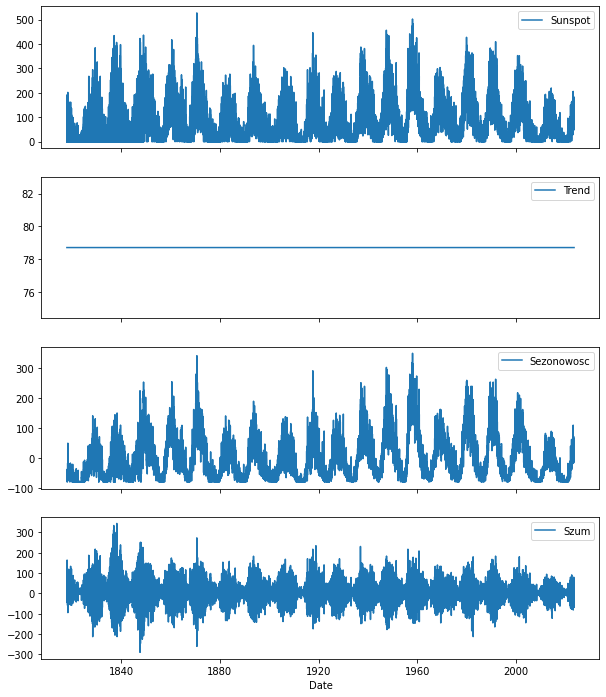

In [41]:
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

axs[0].plot(sunspot_series.index, sunspot_series, label='Sunspot')
axs[0].legend()

axs[1].plot(sunspot_series.index, trend, label='Trend')
axs[1].legend()

axs[2].plot(sunspot_series.index, seasonality, label='Sezonowosc')
axs[2].legend()

axs[3].plot(sunspot_series.index, residuals, label='Szum')
axs[3].legend()

plt.xlabel('Date')
plt.show()